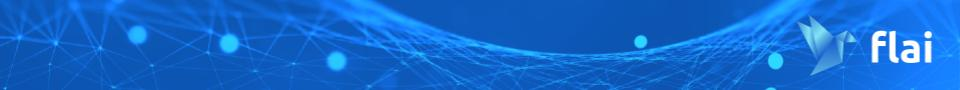

# **Covid-19 no Brasil - Evolução nos 2 primeiros anos da Pandemia**

## **Entendendo o contexto**

Em  25 de Fevereiro de 2020 foi registrado o primeiro caso de Covid-19 no Brasil, no Estado de São Paulo. Em 05 de Março deste mesmo ano foi confirmado um caso no Rio de Janeiro, e no dia seguinte - 06 de março - foi confirmados casos na Bahia e Espirito Santo. Em 11 de Março de 2020 a Organização Mundial de Saúde decretou Pandemia de Covid-19 e em 17 de março foi registrado o primeiro óbito no Brasil no estado de São Paulo. Somente quase 1 ano depois do primeiro caso registrado foi que iniciou a vacinação no Brasil. Em 2 anos de pandemia, o Brasil passou por 3 ondas de casos devido ao Covid-19, e continou registrando casos e mortes por complicações desse vírus.

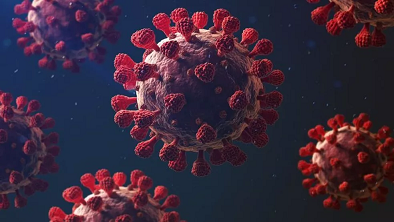

### **O Objetivo da Aula**

Entender a evolução da Covid-19 nos 2 primeiros anos da Pandemia nos Estados do Brasil através de visualização de dados.

### **O dataset**

Estes conjuntos de dados, oriundos dos registros, foi estruturado de forma que cada instância corresponde a um dia do ano em terminado recorte regional, e os atributos são:

- **epi_week:**         
- **date:**
- **country:**       
- **state:**         
- **city:**          
- **newDeaths:**                                     
- **deaths:**           
- **newCases:**         
- **totalCases:**                                    
- **deathsMS:**         
- **totalCasesMS:**                                  
- **deaths_per_100k_inhabitants:**                   
- **totalCases_per_100k_inhabitants:**               
- **deaths_by_totalCases:**                          
- **recovered:**                                     
- **suspects:**                                      
- **tests:**                                         
- **tests_per_100k_inhabitants:**                    
- **vaccinated:**                                   
- **vaccinated_per_100_inhabitants:**               
- **vaccinated_second:**                             
- **vaccinated_second_per_100_inhabitants:**        
- **vaccinated_single:**                             
- **vaccinated_single_per_100_inhabitants :**     
- **vaccinated_third:**                              
- **vaccinated_third_per_100_inhabitants:**          
- **population:**                                    
- **Pais:**                                           
- **Nome_Regiao:**                                    
- **Codigo_Regiao :**                                
- **Nome_UF:**                                        
- **Codigo_UF:**                                     
- **Sigla_UF:**                                 

O conjunto de dado está disponível em um repositório no GitHub que pode ser acessado através dos links:

- https://raw.githubusercontent.com/jonates/opendata/master/covid19_brasil/cases-brazil-states.csv'


### **A Biblioteca Plotly**

Plotly é uma biblioteca que fornece diversos gráficos dinâmicos e interativos.

Para maiores informações do Plotly, consulte a documentação no endereço a seguir:

- https://plotly.com/

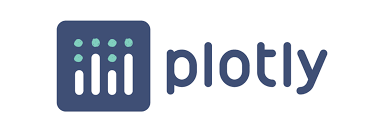

## **Hands-on**

1. **Carregar dados**;
2. **Entender a estrutura dos dados**;
3. **Transformar dados**;
4. **Elaboração do Gráfico**.

### **Pré-Processamento**

#### **Carregando o conjunto de dados**

In [50]:
# Importando o Pandas
import pandas as pd

In [51]:
# Importando o conjunto de dados
covid = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/covid19_brasil/cases-brazil-states.csv', 
    sep=',',
    decimal='.'
)

#### **Entendendo a estrutura o conjunto de dados**

In [52]:
# Espiando o conjunto de dados
covid.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Espiando a estrutura do conjunto de dados
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20986 entries, 0 to 20985
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   epi_week                               20986 non-null  int64  
 1   date                                   20986 non-null  object 
 2   country                                20986 non-null  object 
 3   state                                  20986 non-null  object 
 4   city                                   20986 non-null  object 
 5   newDeaths                              20986 non-null  int64  
 6   deaths                                 20986 non-null  int64  
 7   newCases                               20986 non-null  int64  
 8   totalCases                             20986 non-null  int64  
 9   deathsMS                               20986 non-null  int64  
 10  totalCasesMS                           20986 non-null  int64  
 11  de

#### **Transformando o conjunto de dados**

In [54]:
# Transformando o atributo 'date' em datetime (e salvando no atributo data)
covid['data'] = pd.to_datetime(covid['date'], infer_datetime_format=True)

In [55]:
# Carregando arquivo com geoinformação
geoinformacao = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/codigos_IBGE_UF_Regioes/codigos_IBGE_UF_Regioes.csv', 
    sep=';',
    encoding = 'latin-1'
)

# espiando
geoinformacao.head(2)

,Pais,Nome_Regiao,Codigo_Regiao,Nome_UF,Codigo_UF,Sigla_UF
0,Brasil,Norte,1,Rondônia,11,RO
1,Brasil,Norte,1,Acre,12,AC


In [56]:
# Trazendo geoinformações para o dataset de covid-19
covid = pd.merge(
    left = covid,
    right = geoinformacao,
    how = 'left',
    left_on = 'state',
    right_on = 'Sigla_UF'
)

# Verificando a nova estrutura do dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20986 entries, 0 to 20985
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   epi_week                               20986 non-null  int64         
 1   date                                   20986 non-null  object        
 2   country                                20986 non-null  object        
 3   state                                  20986 non-null  object        
 4   city                                   20986 non-null  object        
 5   newDeaths                              20986 non-null  int64         
 6   deaths                                 20986 non-null  int64         
 7   newCases                               20986 non-null  int64         
 8   totalCases                             20986 non-null  int64         
 9   deathsMS                               20986 non-null  int64 

### **Evolução da Covid-19 nos Estados do Brasil**

#### **Preparando o ambiente para rodar gráficos em Plotly**

In [57]:
# Importando as bibliotecas necessarias
import plotly.express as px

#### **Prevalência x Mortalidade Acumulada por Covid-19 nas Unidades da Federação do BRasil**

In [58]:
# Filtrando somente resultados total do Brasil após maio de 2020
covid_uf = covid.query('(data>"2020-05-31") & (state!="TOTAL") ')
covid_uf

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,data,Pais,Nome_Regiao,Codigo_Regiao,Nome_UF,Codigo_UF,Sigla_UF
2254,23,2020-06-01,Brazil,AC,TOTAL,13,161,107,6326,161,...,NaN,NaN,NaN,2020-06-01,Brasil,Norte,1.0,Acre,12.0,AC
2255,23,2020-06-01,Brazil,AL,TOTAL,18,461,549,10837,461,...,NaN,NaN,NaN,2020-06-01,Brasil,Nordeste,2.0,Alagoas,27.0,AL
2256,23,2020-06-01,Brazil,AM,TOTAL,19,2071,396,41774,2071,...,NaN,NaN,NaN,2020-06-01,Brasil,Norte,1.0,Amazonas,13.0,AM
2257,23,2020-06-01,Brazil,AP,TOTAL,6,228,288,9890,228,...,NaN,NaN,NaN,2020-06-01,Brasil,Norte,1.0,Amapá,16.0,AP
2258,23,2020-06-01,Brazil,BA,TOTAL,34,701,506,18898,701,...,NaN,NaN,NaN,2020-06-01,Brasil,Nordeste,2.0,Bahia,29.0,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20980,213,2022-03-31,Brazil,RS,TOTAL,13,39049,3615,2274550,39049,...,2.72987,4779384.0,42.00829,2022-03-31,Brasil,Sul,4.0,Rio Grande do Sul,43.0,RS
20981,213,2022-03-31,Brazil,SC,TOTAL,2,21662,1425,1676215,21662,...,3.87110,2344651.0,32.72464,2022-03-31,Brasil,Sul,4.0,Santa Catarina,42.0,SC
20982,213,2022-03-31,Brazil,SE,TOTAL,2,6317,143,325921,6317,...,1.75430,835513.0,36.34726,2022-03-31,Brasil,Nordeste,2.0,Sergipe,28.0,SE
20983,213,2022-03-31,Brazil,SP,TOTAL,72,167374,8426,5257693,167374,...,2.68047,23431867.0,51.02864,2022-03-31,Brasil,Sudeste,3.0,São Paulo,35.0,SP


In [59]:
 # Construindo o diagrama de dispersão customizado
fig = px.scatter(
    data_frame = covid_uf, 
    x="totalCases_per_100k_inhabitants", 
    y="deaths_per_100k_inhabitants", 
    title="<b>Prevalência x Mortalidade Acumulada por Covid-19 por UF</b><br>Brasil, jun/20 - mar/22.",
    labels={
        'totalCases_per_100k_inhabitants':'Total de Casos de Covid-19 por 100 mil habitantes',
        'deaths_per_100k_inhabitants':'Total de Mortes de Covid-19 por 100 mil habitantes'
    },
    animation_frame="date", 
    animation_group="state",
    color="Nome_Regiao", 
    color_discrete_sequence =['deeppink','orange','blue','lime','dimgrey'],
    hover_name="state",
    range_x=[0,30000], 
    range_y=[0,500],
    width=800, 
    height=600,
    template='simple_white'
)

# Customizando fonte, orientação e posição da legenda
fig.update_layout( 
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="h", y=-0.5, yanchor="bottom", x=0.5, xanchor="center"
    )
)

# Custommizando os marcadores
fig.update_traces(
    marker=dict(size=14,line=dict(width=1, color='black')),
    selector=dict(mode='markers')
)

# Controlando a velocidade da animação (Time is in milliseconds)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5

# Visualizando o gráfico
fig.show()

- https://plotly.com/python/bubble-charts/ 
- https://plotly.com/python/styling-plotly-express/
- https://plotly.com/python/marker-style/